In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
dataset = pd.read_csv('housing.csv',  header=None)
dataset.head(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [15]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


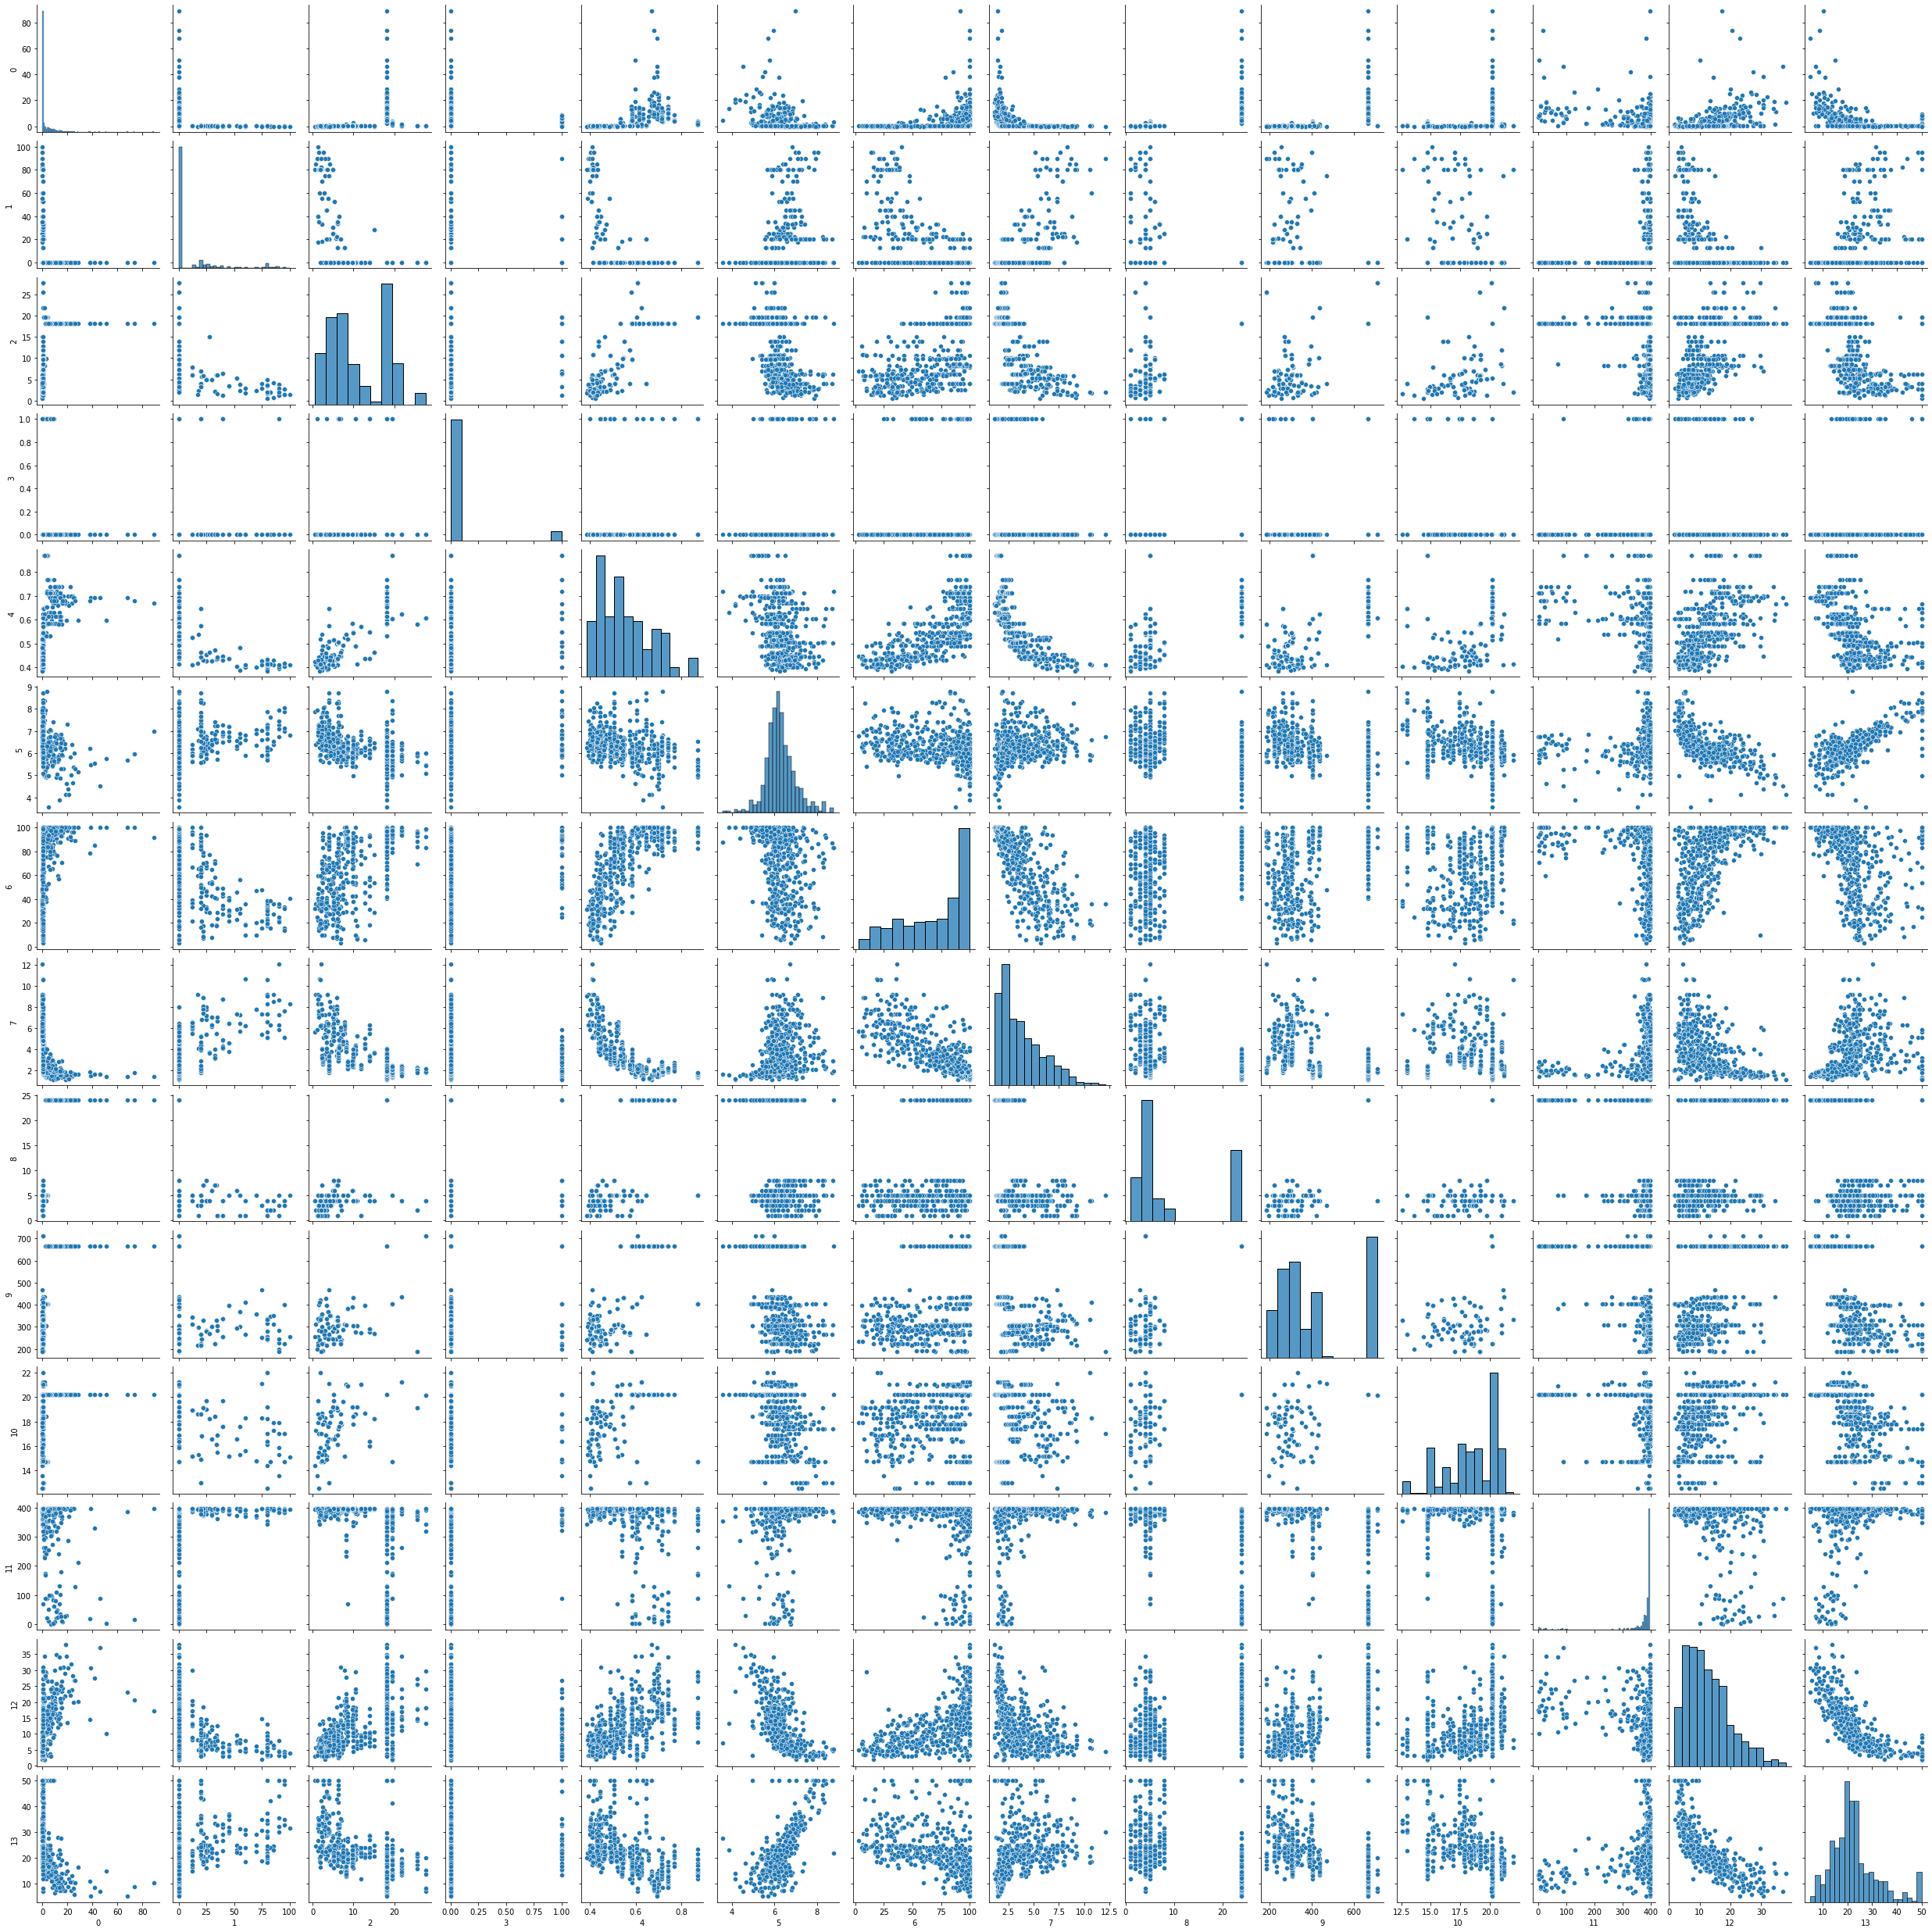

In [16]:
sns.pairplot(dataset)

In [5]:
X=dataset.iloc[:,0:13]
y=dataset.iloc[:,13].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=13))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor


In [9]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [10]:
results=regressor.fit(X_train,y_train)

Epoch 1/100
12/12 [==============================] - 1s 1ms/step - loss: 0.3195 - mae: 0.4922 - accuracy: 0.0089
Epoch 2/100
12/12 [==============================] - 0s 909us/step - loss: 0.1368 - mae: 0.3103 - accuracy: 0.0045
Epoch 3/100
12/12 [==============================] - 0s 909us/step - loss: 0.1030 - mae: 0.2583 - accuracy: 0.0083
Epoch 4/100
12/12 [==============================] - 0s 909us/step - loss: 0.0891 - mae: 0.2318 - accuracy: 0.0150
Epoch 5/100
12/12 [==============================] - 0s 818us/step - loss: 0.0618 - mae: 0.1851 - accuracy: 0.0216
Epoch 6/100
12/12 [==============================] - 0s 909us/step - loss: 0.0566 - mae: 0.1804 - accuracy: 0.0147
Epoch 7/100
12/12 [==============================] - 0s 818us/step - loss: 0.0493 - mae: 0.1659 - accuracy: 0.0177
Epoch 8/100
12/12 [==============================] - 0s 817us/step - loss: 0.0529 - mae: 0.1681 - accuracy: 0.0155
Epoch 9/100
12/12 [==============================] - 0s 909us/step - loss: 0.0496 

In [11]:
y_pred= regressor.predict(X_test)

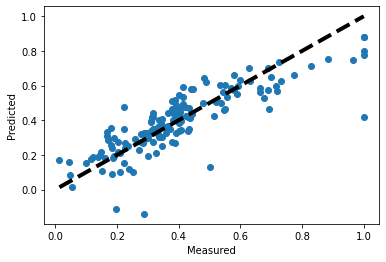

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()